Mage Duel!
Let's use what we've learned to play a mage duel!

Imagine your wizard has 6d4 health points and you have spells that do 6d4 damage. "6d4" means rolling six 4-sided dice and summing the result.

Your opposing mage has 4d6 health points and spells that do 4d6. "4d6" means rolling four six-sided dice and summing the result.

Exercises
Simulate mage duels to answer who is the more powerful mage?

Before running simulations, do you have a hypothesis of which mage will win? Do you have a hunch? Write it down. This is your first exercise.
Simulate 10 mage duels. Is there a clear winner? Run that 10 duel simulation again. Was the answer similar?
Do the results change much at 100 duels?
Now, simulate 10,000 mage duels. Is there a clear winner?

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
six_d_four_attack = np.random.randint(1,5,1000*6).reshape(1000,6).sum(axis=1)
six_d_four_defense = np.random.randint(1,5,1000*6).reshape(1000,6).sum(axis=1)
six_d_four_total = six_d_four_attack + six_d_four_defense

In [58]:
four_d_six_attack = np.random.randint(1,7,1000*4).reshape(1000,4).sum(axis=1)
four_d_six_defense = np.random.randint(1,7,1000*4).reshape(1000,4).sum(axis=1)
four_d_six_total = four_d_six_attack + four_d_six_defense

In [59]:
data = pd.DataFrame({'six_d_four_attack':six_d_four_attack,
                     'six_d_four_defense':six_d_four_defense,
                     'four_d_six_attack':four_d_six_attack,
                     'four_d_six_defense':four_d_six_defense})

In [60]:
data.head()

,six_d_four_attack,six_d_four_defense,four_d_six_attack,four_d_six_defense
0,15,14,12,15
1,15,16,10,14
2,14,9,14,15
3,15,15,12,11
4,18,10,15,12


In [66]:
data.describe()

,six_d_four_attack,six_d_four_defense,four_d_six_attack,four_d_six_defense
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,14.972000,15.056000,13.957000,13.976000
std,2.700835,2.717766,3.497339,3.312763
min,7.000000,8.000000,4.000000,4.000000
25%,13.000000,13.000000,12.000000,12.000000
50%,15.000000,15.000000,14.000000,14.000000
75%,17.000000,17.000000,16.000000,16.000000
max,24.000000,23.000000,24.000000,24.000000


<AxesSubplot:>

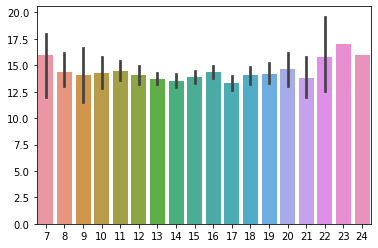

In [63]:
sns.barplot(x = six_d_four_attack, y = four_d_six_attack,data=data)

In [76]:
data.head()

,six_d_four_attack,six_d_four_defense,four_d_six_attack,four_d_six_defense
0,15,14,12,15
1,15,16,10,14
2,14,9,14,15
3,15,15,12,11
4,18,10,15,12


In [77]:
cols = ['six_d_four_attack','six_d_four_defense','four_d_six_attack','four_d_six_defense']

In [78]:
for col in cols:
    data[col+'-csum'] = data[col].cumsum()

In [79]:
data.head()

,six_d_four_attack,six_d_four_defense,four_d_six_attack,four_d_six_defense,six_d_four_attack-csum,six_d_four_defense-csum,four_d_six_attack-csum,four_d_six_defense-csum
0,15,14,12,15,15,14,12,15
1,15,16,10,14,30,30,22,29
2,14,9,14,15,44,39,36,44
3,15,15,12,11,59,54,48,55
4,18,10,15,12,77,64,63,67


<AxesSubplot:ylabel='six_d_four_attack-csum'>

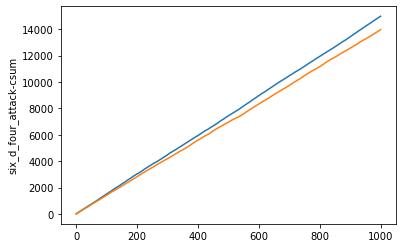

In [84]:
sns.lineplot(data=data,x = data.index, y ='six_d_four_attack-csum')
sns.lineplot(data=data,x = data.index, y ='four_d_six_attack-csum')